In [1]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
from numpy.random import seed

seed(42)
import tensorflow as tf

tf.random.set_seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
mpl.rcParams["lines.linewidth"] = 3
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config IPCompleter.greedy=True
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.core.display import HTML

HTML(open("custom.html", "r").read())

# Chapter 8c: Convolution Neural Networks

## Network Architectures

The neural networks which we have seen till now are the simplest kind of neural networks.
There exist more sophisticated network architectures especially designed for specific applications.
Some of them are as follows:

###  Convolution Neural Networks (CNNs)

These networks are used mostly for computer vision like tasks such as image classification and object detection. 
One of the typical CNN networks is shown below.

<center>
<figure>
<img src="./images/neuralnets/CNN.jpg" width="800"/>
<tr><td><center><sub>Source: <a href="https://doi.org/10.3390/s19224933">Tabian, I.; Fu, H.; Sharif Khodaei, Z. A Convolutional Neural Network for Impact Detection and Characterization of Complex Composite Structures. Sensors 2019, 19, 4933. https://doi.org/10.3390/s19224933.</a></sub></center></td></tr>
</center>

CNNs consist of new type of layers such as convolution and pooling layers.

###  Recurrent Neural Networks (RNNs)

RNNs are used for problems such as time-series data, speech recognition and translation.

### Generative adversarial networks (GANs)

GANs consist of 2 parts, a generative network and a discriminative network. The generative network produces data which is then fed to the discriminative network which judges if the new data belongs to a specified dataset. Then via feedback loops the generative network becomes better and better at creating images similar to the dataset the discriminative network is judging against. At the same time the discriminative network get better and better at identifyig **fake** instances which are not from the reference dataset. 

## CNN in a bit more detail

The standard CNN architecture can be seen as 2 parts:

* Feature extraction
* Classification

For the **classification** part we use the densly connected network as shown in the TensorFlow (keras) examples above.

However, for the **feature extraction** part we use new types of layers called **convolution** layers

### What is a Convolution?


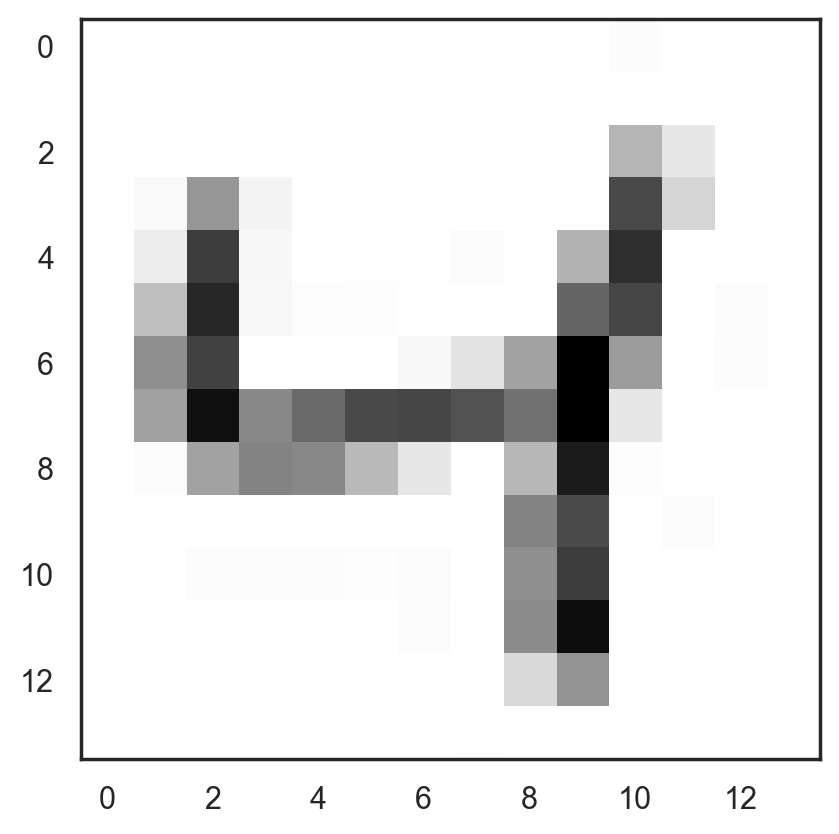

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("white")
# Loading the train and test data
digit = np.genfromtxt("data/digit_4_14x14.csv", delimiter=",").astype(np.int16)
plt.imshow(digit, "gray_r")

This image in matrix form

In [3]:
def plot_astable(matrix, hw=0.15):
    matrix = plt.table(cellText=matrix, loc=(0, 0), cellLoc="center")
    matrix.set_fontsize(14)
    cells = matrix.get_celld()
    for i in cells:
        cells[i].set_height(hw)
        cells[i].set_width(hw)
    plt.axis("off")

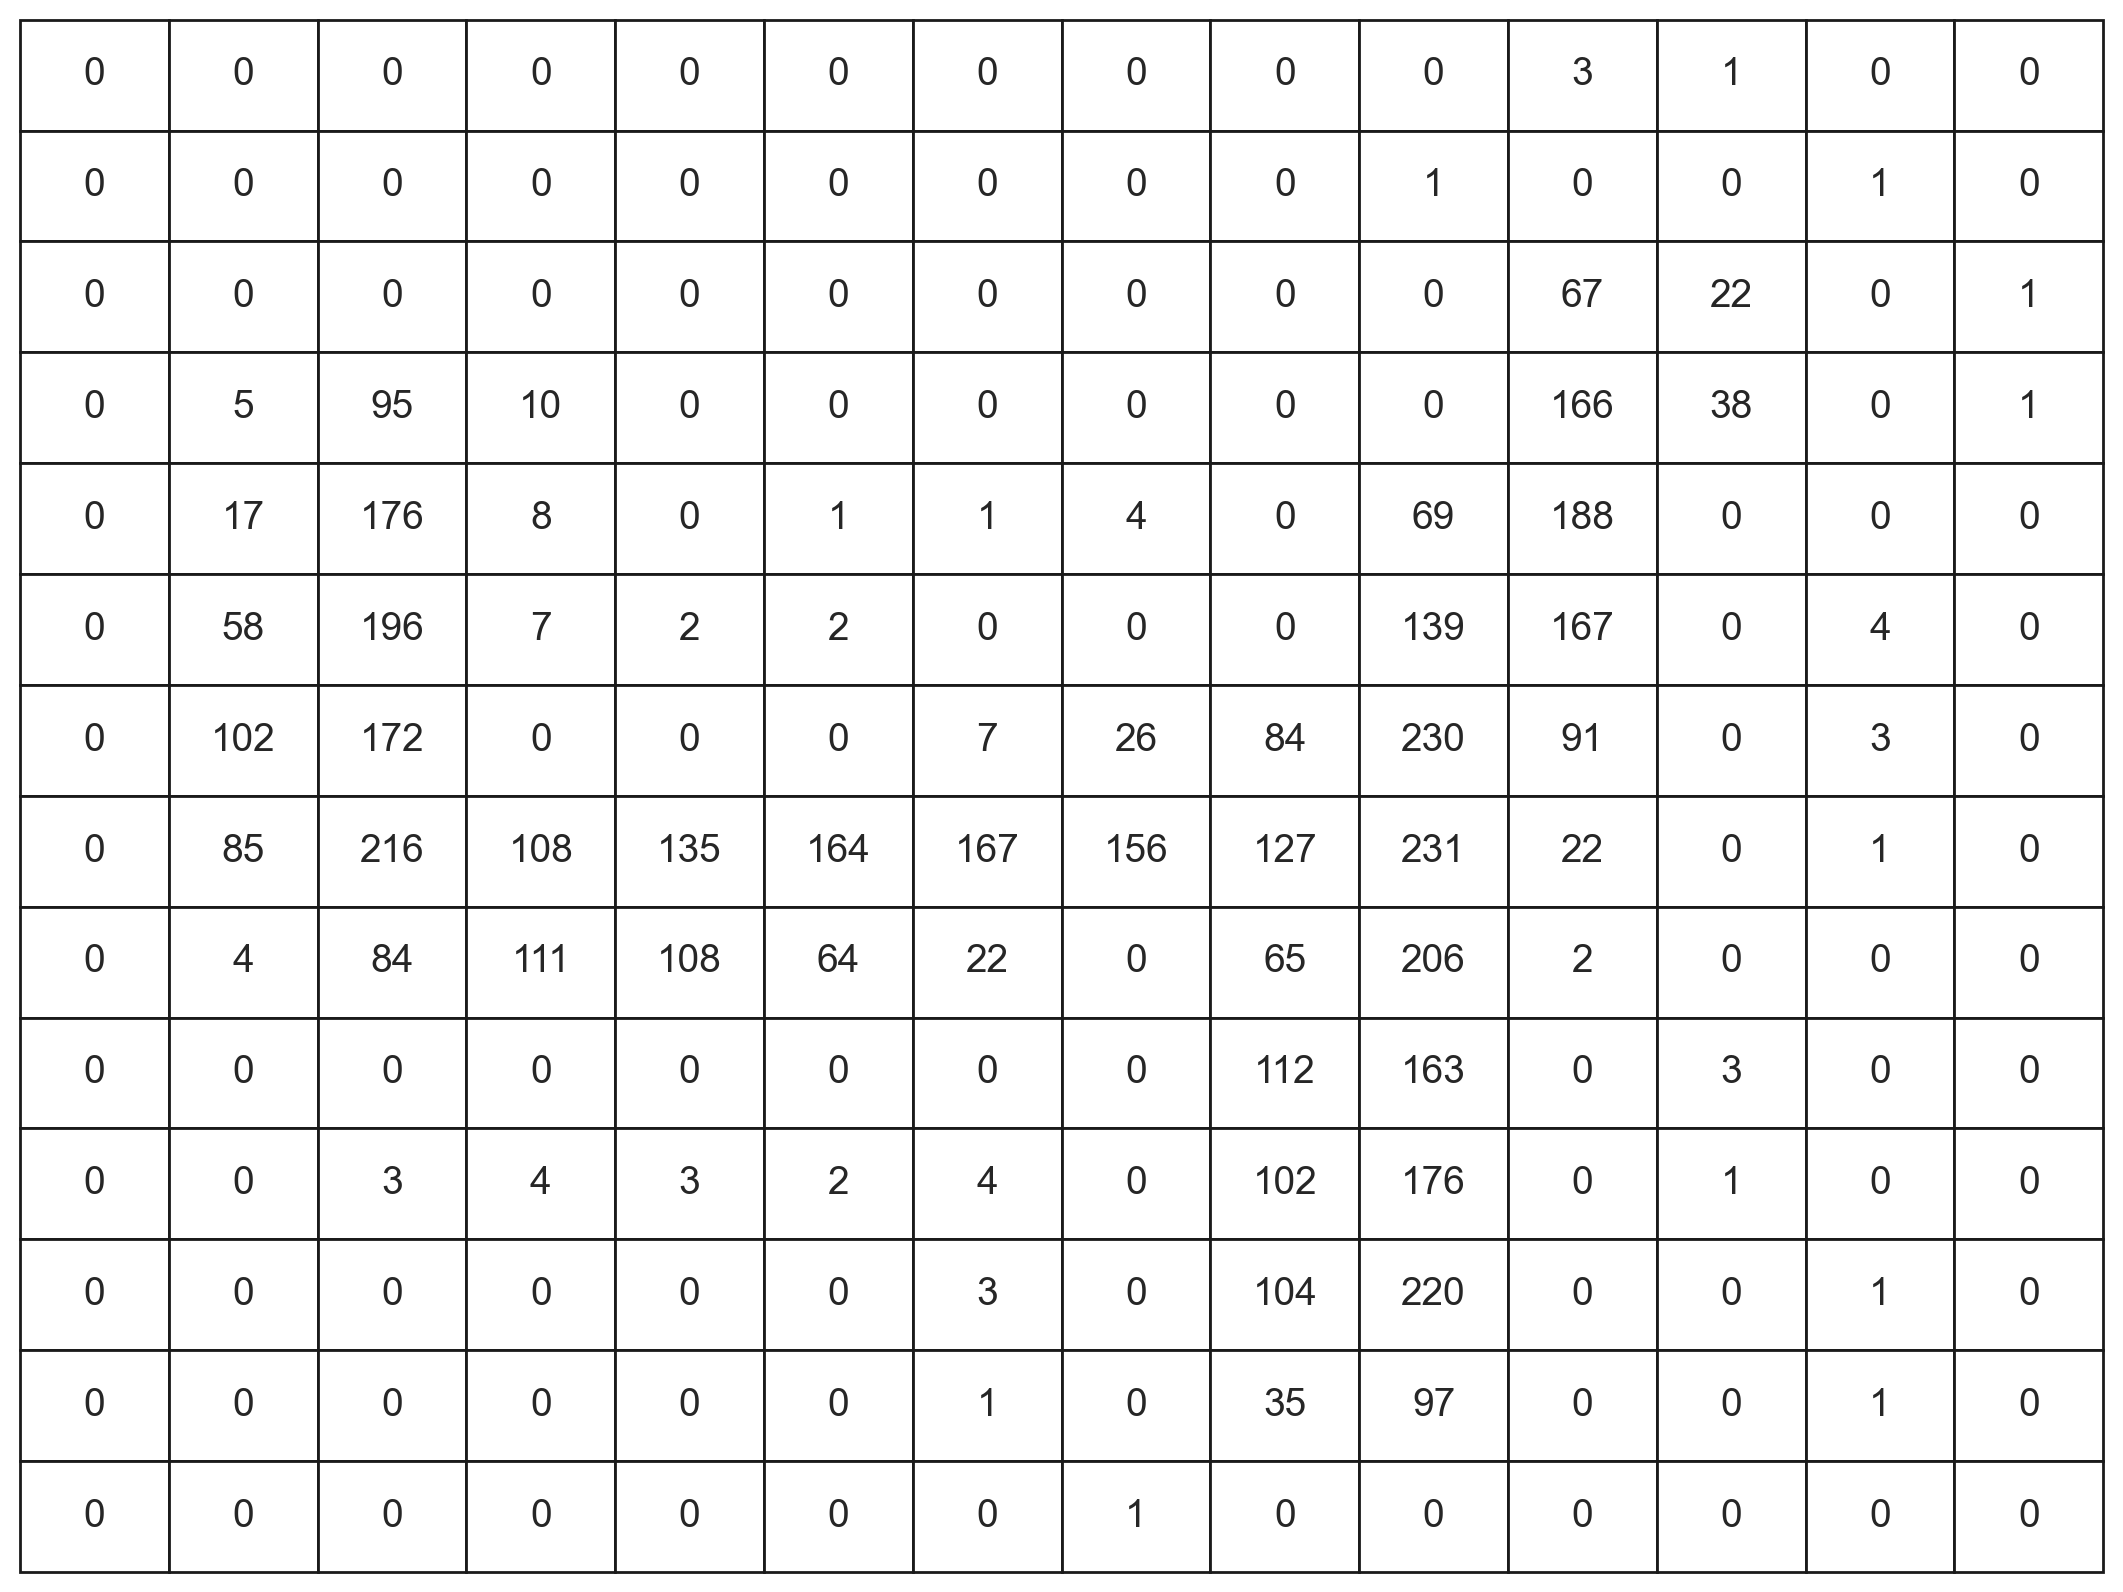

In [4]:
plot_astable(digit)

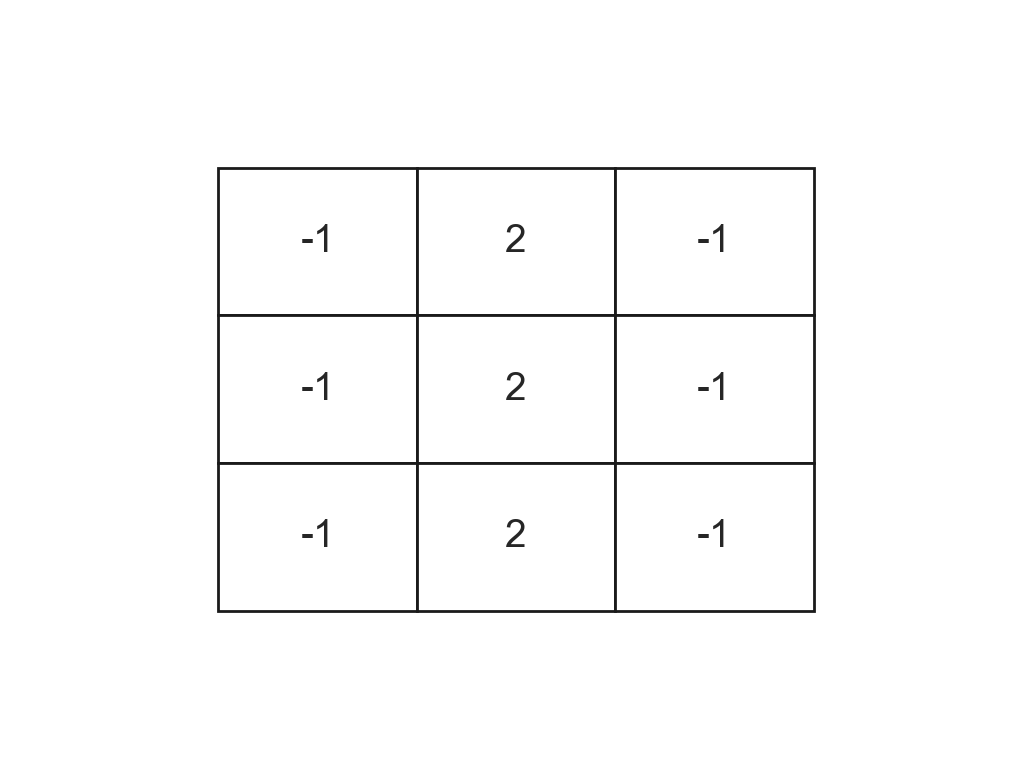

In [5]:
# Vertical edge detection
vertical_edge_kernel = np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]])
plot_astable(vertical_edge_kernel, 0.2)

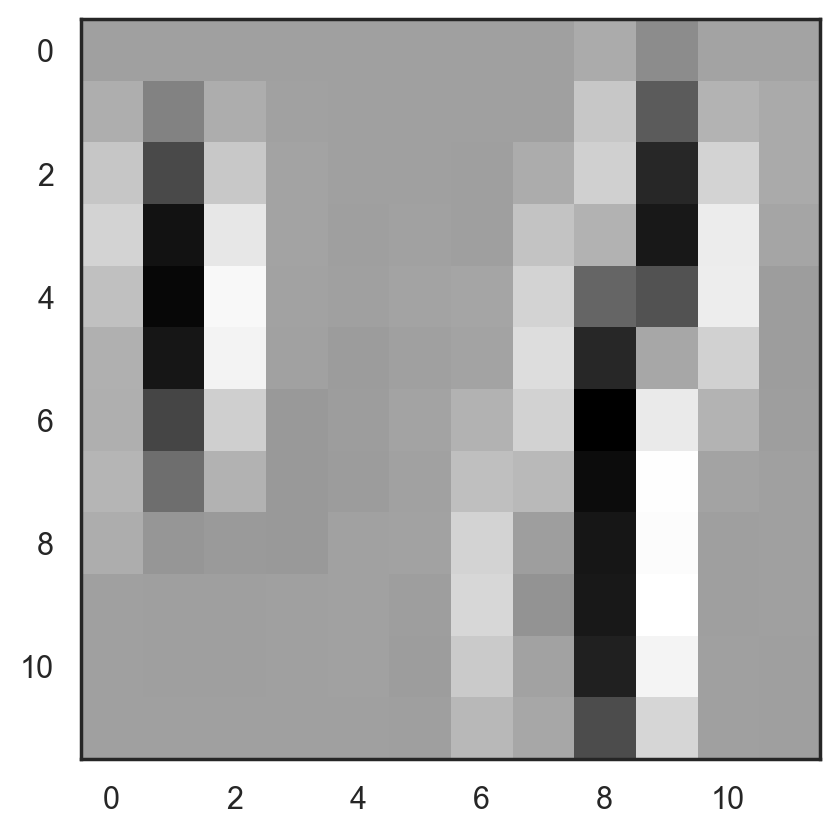

In [6]:
import numpy as np


def convolution(matrix, kernel):
    # This function computes a convolution between a matrix and a kernel/filter without any padding
    width_kernel = kernel.shape[0]
    height_kernel = kernel.shape[1]
    convolution = np.zeros(
        (matrix.shape[0] - width_kernel + 1, matrix.shape[1] - height_kernel + 1)
    )
    for i in range(matrix.shape[0] - width_kernel + 1):
        for j in range(matrix.shape[1] - height_kernel + 1):
            convolution[i, j] = np.sum(
                np.multiply(matrix[i : i + width_kernel, j : j + height_kernel], kernel)
            )
    return convolution


vertical_detect = convolution(digit, vertical_edge_kernel)
plt.imshow(vertical_detect, cmap="gray_r");

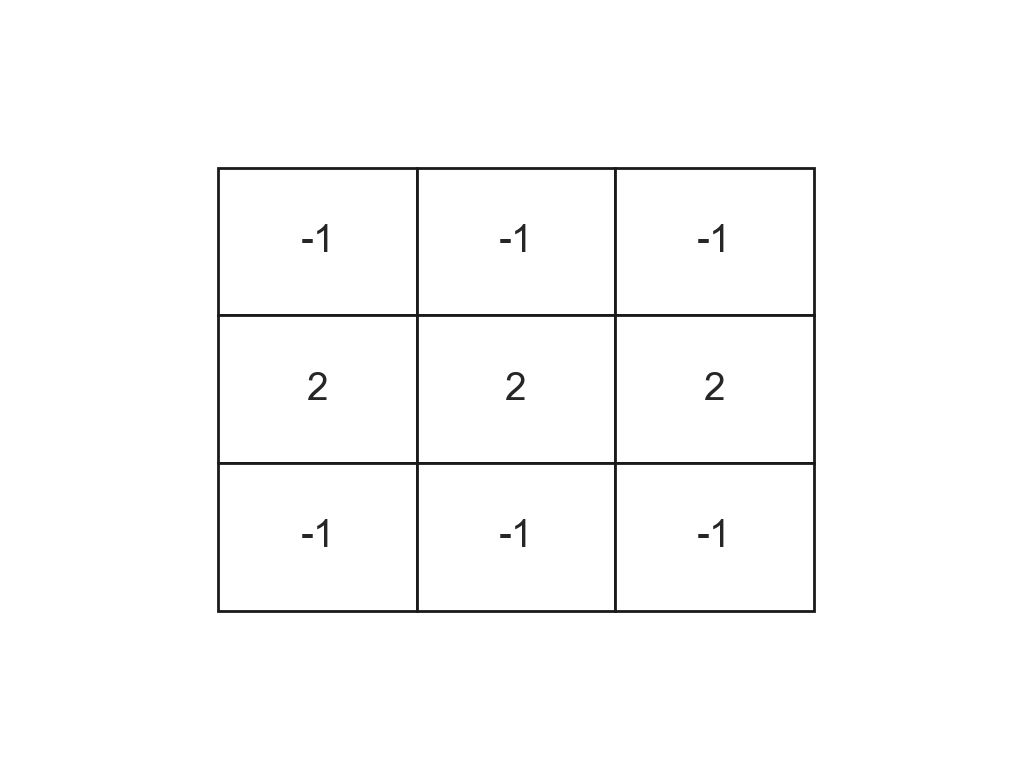

In [7]:
# Horizontal edge detection
horizontal_edge_kernel = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])
plot_astable(horizontal_edge_kernel, 0.2)

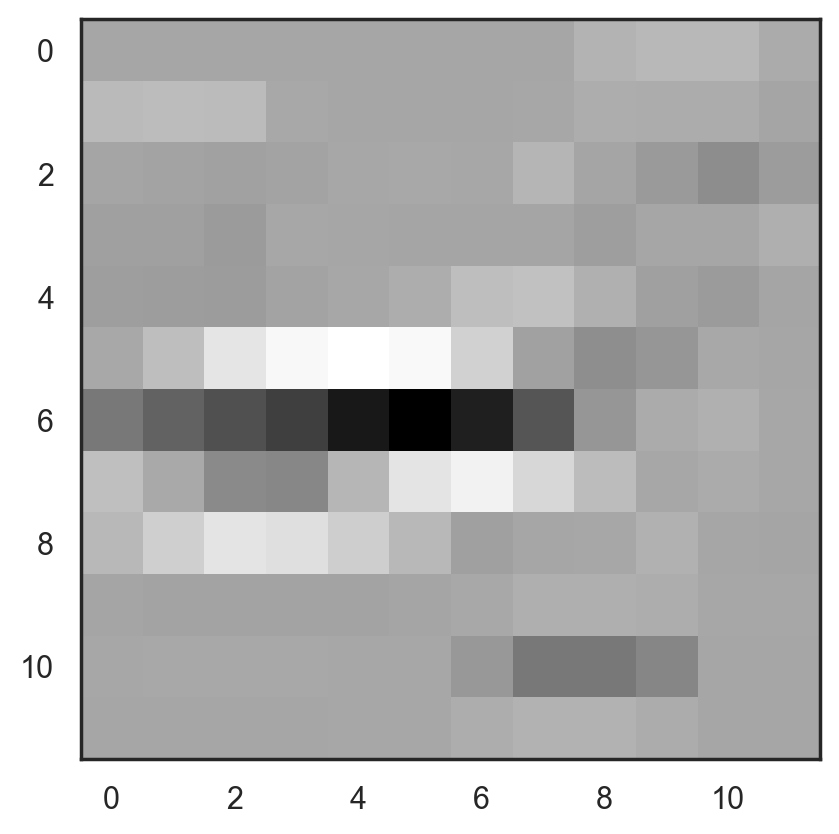

In [8]:
horizontal_detect = convolution(digit, horizontal_edge_kernel)
plt.imshow(horizontal_detect, cmap="gray_r");

### Maxpooling
Taking maximum in n x n sized sliding windows

In [9]:
import numpy as np


def maxpool_2x2(matrix):
    out_dim = np.array([matrix.shape[0] / 2, matrix.shape[1] / 2]).astype(int)
    subsample = np.zeros((out_dim))
    for i in range(out_dim[0]):
        for j in range(out_dim[1]):
            subsample[i, j] = np.max(matrix[i * 2 : i * 2 + 2, j * 2 : j * 2 + 2])
    return subsample

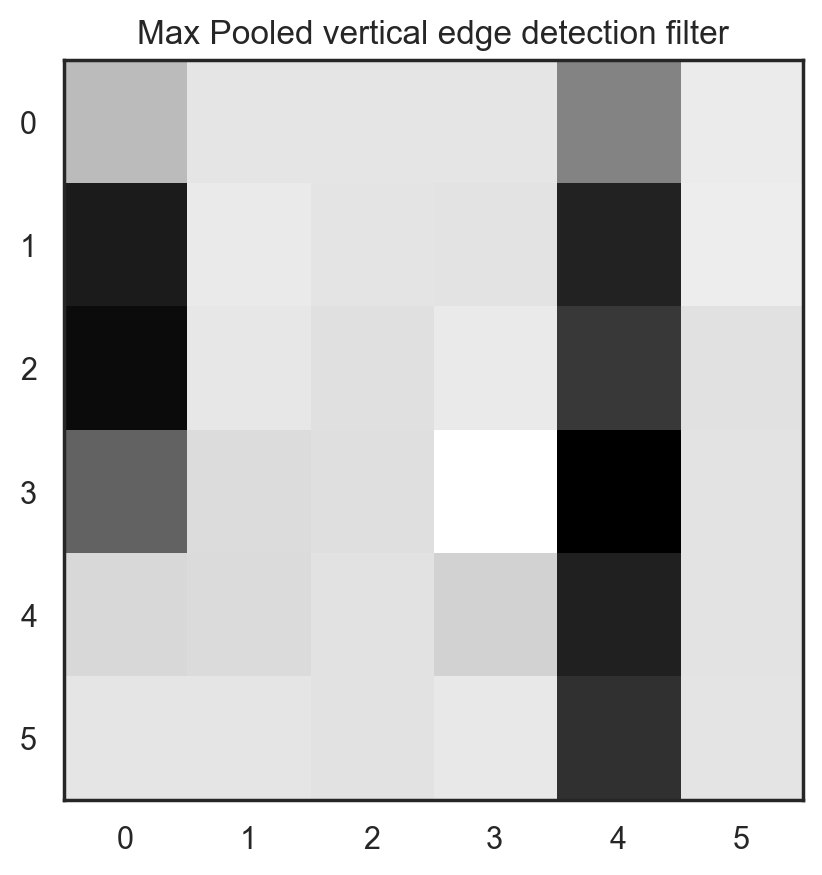

In [10]:
import matplotlib.pyplot as plt

subsampled_image = maxpool_2x2(vertical_detect)
plt.imshow(subsampled_image, cmap="gray_r")
plt.title("Max Pooled vertical edge detection filter");

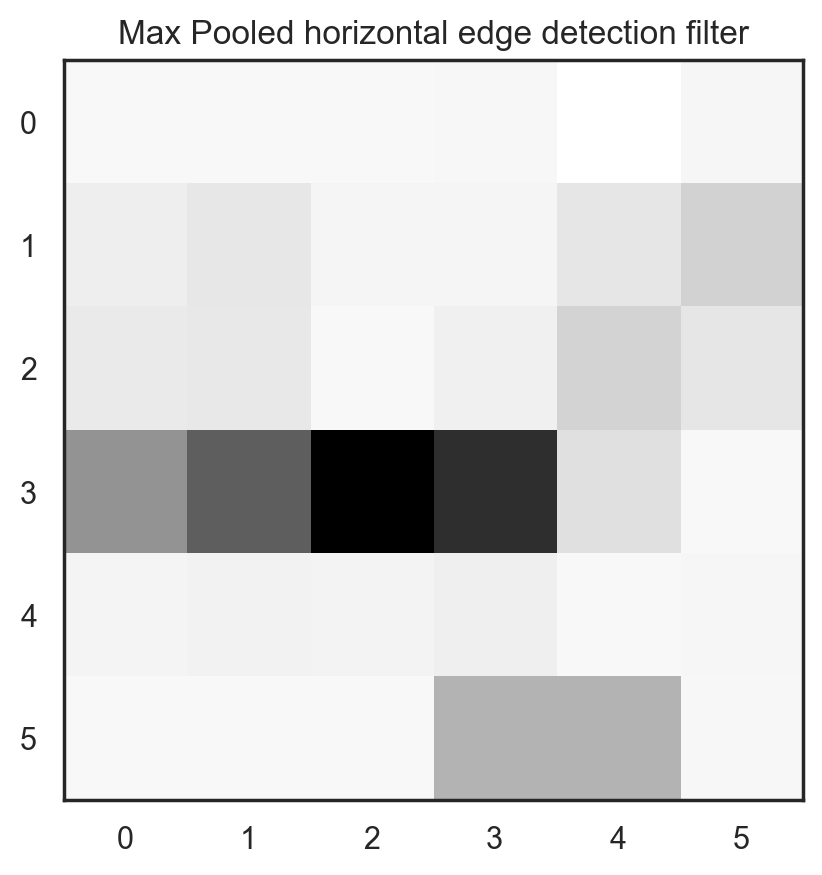

In [11]:
subsampled_image = maxpool_2x2(horizontal_detect)
plt.imshow(subsampled_image, cmap="gray_r")
plt.title("Max Pooled horizontal edge detection filter");

### Let's explore some more of such filters/kernels!!

http://setosa.io/ev/image-kernels

## CNN Examples

For this example we will work with a dataset called fashion-MNIST which is quite similar to the MNIST data above.
> Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.
source: https://github.com/zalandoresearch/fashion-mnist

The 10 classes of this dataset are:

| Label| Item |
| --- | --- |
| 0 |	T-shirt/top |
| 1	| Trouser |
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|

In [12]:
# Loading the dataset in tensorflow
# Later you can explore and play with other datasets with come with tensorflow
from tensorflow.keras.datasets import fashion_mnist

# Loading the train and test data

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

items = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

This item is a:  Trouser


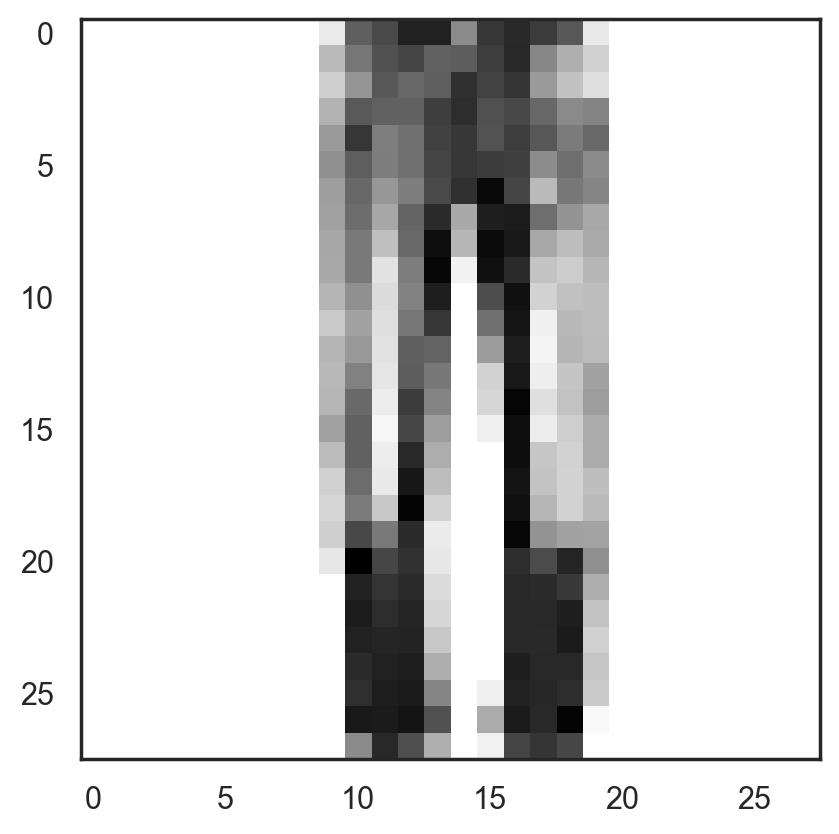

In [13]:
# We can see that the training set consists of 60,000 images of size 28x28 pixels
import matplotlib.pyplot as plt
import numpy as np

i = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[i], cmap="gray_r")
print("This item is a: ", items[y_train[i]])

In [14]:
# Also we need to reshape the input data such that each sample is a 4D matrix of dimension
# (num_samples, width, height, channels). Even though these images are grayscale we need to add
# channel dimension as this is expected by the Conv function
X_train_prep = X_train.reshape(X_train.shape[0], 28, 28, 1) / 255.0
X_test_prep = X_test.reshape(X_test.shape[0], 28, 28, 1) / 255.0

from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

print(y_train_onehot.shape)

(60000, 10)


In [15]:
# Creating a CNN similar to the one shown in the figure from LeCun paper
# In the original implementation Average pooling was used. However, we will use maxpooling as this
# is what us used in the more recent architectures and is found to be a better choice
# Convolution -> Pooling -> Convolution -> Pooling -> Flatten -> Dense -> Dense -> Output layer
from tensorflow.keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPool2D,
)
from tensorflow.keras.models import Sequential


def simple_CNN():

    model = Sequential()

    model.add(Conv2D(6, (3, 3), input_shape=(28, 28, 1), activation="relu"))

    model.add(MaxPool2D((2, 2)))

    model.add(Conv2D(16, (3, 3), activation="relu"))

    model.add(MaxPool2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(120, activation="relu"))

    model.add(Dense(84, activation="relu"))

    model.add(Dense(10, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
    )

    return model


model = simple_CNN()
model.summary()

2024-03-14 13:43:15.417674: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-03-14 13:43:15.417694: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-03-14 13:43:15.417700: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-03-14 13:43:15.417729: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-14 13:43:15.417741: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [16]:
num_epochs = 5
model_run = model.fit(
    X_train_prep,
    y_train_onehot,
    epochs=num_epochs,
    batch_size=64,
    validation_data=(X_test_prep, y_test_onehot),
)

Epoch 1/5


2024-03-14 13:43:16.397510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.6159 - accuracy: 0.7691

2024-03-14 13:43:27.264047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 12s 11ms/step - loss: 0.6159 - accuracy: 0.7691 - val_loss: 0.6623 - val_accuracy: 0.7609
Epoch 2/5
938/938 [==============================] - 9s 10ms/step - loss: 0.4542 - accuracy: 0.8340 - val_loss: 0.5305 - val_accuracy: 0.8253
Epoch 3/5
938/938 [==============================] - 12s 13ms/step - loss: 0.4969 - accuracy: 0.8321 - val_loss: 0.7656 - val_accuracy: 0.7803
Epoch 4/5
938/938 [==============================] - 12s 13ms/step - loss: 0.7561 - accuracy: 0.8077 - val_loss: 1.4455 - val_accuracy: 0.7636
Epoch 5/5
938/938 [==============================] - 10s 11ms/step - loss: 1.5898 - accuracy: 0.7824 - val_loss: 3.5260 - val_accuracy: 0.6957


## (optional) Exercise section
* Use the above model or improve it (change number of filters, add more layers etc. on the MNIST example and see if you can get a better accuracy than what we achieved with a vanilla neural network)

## Exercise section
* Explore the CIFAR10 (https://www.cs.toronto.edu/~kriz/cifar.html) dataset included with TensorFlow (Keras) and build+train a simple CNN to classify it

In [17]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


Copyright (C) 2019-2022 ETH Zurich, SIS ID

## Functional API

The Sequential API of TensorFlow (Keras) is good enough for simple models with a linear topology.
However, the functional api is more flexible and allows for more complicated use cases such as:
* models with non-linear topology
* shared layers
* multiple inputs or outputs

Examples of such models:

* U-Net for image segmentation (https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/)
* ResNet https://arxiv.org/pdf/1512.03385.pdf

In [18]:
# Simple example showing the Fashion MNIST example using the functional api
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPool2D
from tensorflow.keras.models import Model


def simple_CNN_functional():

    img_inputs = Input(shape=(28, 28, 1))

    x = Conv2D(6, (3, 3), activation="relu")(img_inputs)

    x = MaxPool2D((2, 2))(x)

    x = Conv2D(16, (3, 3), activation="relu")(x)

    x = MaxPool2D((2, 2))(x)

    x = Flatten()(x)

    x = Dense(120, activation="relu")(x)

    x = Dense(84, activation="relu")(x)

    output = Dense(10, activation="softmax")(x)

    model = Model(inputs=img_inputs, outputs=output, name="fashion_mnist_model")

    model.compile(
        loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
    )

    return model


model = simple_CNN_functional()
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)       

In [19]:
num_epochs = 5
model_run = model.fit(
    X_train_prep,
    y_train_onehot,
    epochs=num_epochs,
    batch_size=64,
    validation_data=(X_test_prep, y_test_onehot),
)

Epoch 1/5


2024-03-14 13:44:22.360018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.6653 - accuracy: 0.7528

2024-03-14 13:44:31.930768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 11s 11ms/step - loss: 0.6653 - accuracy: 0.7528 - val_loss: 0.6350 - val_accuracy: 0.7611
Epoch 2/5
938/938 [==============================] - 10s 10ms/step - loss: 0.4671 - accuracy: 0.8333 - val_loss: 0.5709 - val_accuracy: 0.8149
Epoch 3/5
938/938 [==============================] - 10s 10ms/step - loss: 0.5468 - accuracy: 0.8254 - val_loss: 0.8500 - val_accuracy: 0.7743
Epoch 4/5
938/938 [==============================] - 10s 10ms/step - loss: 1.0596 - accuracy: 0.7903 - val_loss: 1.0182 - val_accuracy: 0.8146
Epoch 5/5
938/938 [==============================] - 10s 10ms/step - loss: 2.6006 - accuracy: 0.7634 - val_loss: 2.8292 - val_accuracy: 0.7717


### Toy ResNet
(source: https://keras.io/guides/functional_api/)

In [20]:
from tensorflow.keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    GlobalAveragePooling2D,
    Input,
    MaxPool2D,
    add,
)
from tensorflow.keras.models import Model


def toy_ResNet():

    inputs = Input(shape=(32, 32, 3), name="img")
    x = Conv2D(32, 3, activation="relu")(inputs)
    x = Conv2D(64, 3, activation="relu")(x)
    block_1_output = MaxPool2D(3)(x)

    x = Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
    x = Conv2D(64, 3, activation="relu", padding="same")(x)
    block_2_output = add([x, block_1_output])

    x = Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
    x = Conv2D(64, 3, activation="relu", padding="same")(x)
    block_3_output = add([x, block_2_output])

    x = Conv2D(64, 3, activation="relu")(block_3_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.5)(x)
    outputs = Dense(10, "softmax")(x)

    model = Model(inputs, outputs, name="toy_resnet")

    return model


model = toy_ResNet()
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 30, 30, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_5 (Conv2D)           (None, 28, 28, 64)           18496     ['conv2d_4[0][0]']            
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 9, 9, 64)             0         ['conv2d_5[0][0]']            
 g2D)                                                                                    

In [21]:
from tensorflow.keras.utils import plot_model

plot_model(model, "mini_resnet.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
